Exercise 1. The OLS asymptotic behavior. (20 points) Prove that the OLS estimator is distributed
asymptotically normal using Monte Carlo simulation.

$$\hat{\beta} \sim N \left(\beta, \sigma^2 E(x_i x_i')^{-1}\right)$$

To prove that, consider the model or data generating process seen in class

$$y_i = 2 + 0.5x_{2,i} + e_i$$
$$e_i \sim N(0, 25)$$

In [129]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt


a. As a preliminary step, create a sample with size $N=100$, a fictitious $x_2 \sim N(0, 1)$, and estimate the model by OLS.

In [139]:
# Set random seed for reproducibility
np.random.seed(42)

def monte_carlo_ols_simulation(N, T=10000, beta_true=np.array([2, 0.5]), sigma_e=5):
    '''
    Monte Carlo simulation of OLS asymptotic properties
    
    Parameters:
    N (int): Sample size
    T (int): Number of Monte Carlo repetitions
    beta_true (array): True parameter values [intercept, slope]
    sigma_e (float): Error standard deviation

    Returns:
    beta_hats (array): Estimated coefficients from each simulation
    se_hats (array): Standard errors of estimates from each simulation
    '''
    beta_hats = np.zeros((T, 2))
    se_hats = np.zeros((T, 2))
    
    for i in range(T):
        # Generate data from DGP: y = 2 + 0.5*x + e, e ~ N(0, 25)
        x = np.random.normal(0, 1, N)
        e = np.random.normal(0, sigma_e, N)
        y = beta_true[0] + beta_true[1] * x + e

        # OLS estimation
        X = sm.add_constant(x)
        ols_result = sm.OLS(y, X).fit()
        beta_hats[i] = ols_result.params
        se_hats[i] = ols_result.bse
    
    return beta_hats, se_hats

# Run simulation for N=100
beta_hats_100, se_hats_100 = monte_carlo_ols_simulation(N=100, T=10000)

# Theoretical asymptotic variance
# For x ~ N(0,1), E(xx') = [[1, 0], [0, 1]]
# Asymptotic variance: sigma^2 * (E(xx'))^-1 = 25 * I
theoretical_se = np.sqrt(25/100)  # SE for slope: sqrt(sigma^2/(N*Var(x)))

print("Monte Carlo Results (N=100):")
print(f"True beta_1: 0.500")
print(f"Mean beta_hat_1: {np.mean(beta_hats_100[:, 1]):.4f}")
print(f"Bias: {np.mean(beta_hats_100[:, 1]) - 0.5:.4f}")
print(f"Monte Carlo SE: {np.std(beta_hats_100[:, 1]):.4f}")
print(f"Theoretical Asymptotic SE: {theoretical_se:.4f}")
print(f"Empirical coverage rate: {np.mean((beta_hats_100[:, 1] - 1.96*se_hats_100[:, 1] <= 0.5) & (0.5 <= beta_hats_100[:, 1] + 1.96*se_hats_100[:, 1])):.3f}")


Monte Carlo Results (N=100):
True beta_1: 0.500
Mean beta_hat_1: 0.5021
Bias: 0.0021
Monte Carlo SE: 0.5106
Theoretical Asymptotic SE: 0.5000
Empirical coverage rate: 0.945


Economic Interpretation:

Monte Carlo Evidence of OLS Properties:
The simulation results demonstrate three fundamental properties of the OLS estimator with sample size $N=100$:

Unbiasedness: The mean of $\hat{\beta}_1$ across 10,000 samples is 0.5021, virtually identical to the true value of 0.5. The bias of 0.0021 is negligible, confirming that $E(\hat{\beta}|X) = \beta$. This means OLS produces correct estimates on average—individual samples may deviate, but there's no systematic over- or under-estimation.

Correct asymptotic variance: The Monte Carlo standard error (0.5106) closely matches the theoretical prediction (0.5000). This validates the asymptotic variance formula $\text{Var}(\hat{\beta}_1) = \sigma^2/(N \cdot \text{Var}(x))$. With $\sigma^2 = 25$, $N=100$, and $\text{Var}(x) \approx 1$, theory predicts SE = 0.5, confirmed empirically.

Valid inference: The empirical coverage rate of 94.5% is remarkably close to the nominal 95% level. This means confidence intervals constructed using the asymptotic normal distribution are reliable, they contain the true parameter about 95% of the time, as promised by theory.

Understanding Individual Sample Variation:
While the Monte Carlo average is correct, individual samples show substantial variation. With SE ≈ 0.51 and $N=100$, a single sample could easily produce $\hat{\beta}_1$ ranging from -0.5 to 1.5 (within 2 standard errors). This wide range reflects the high noise ($\sigma_e = 5$) relative to sample size.

Economic Context and Policy Implications:
Consider this model as a wage equation: $y$ = earnings, $x_2$ = years of education, $\beta_1 = 0.5$ = return per year of schooling.

If a researcher collects one sample of 100 workers and estimates $\hat{\beta}_1 = 0.2$, they might conclude education has a modest effect. Another researcher with a different sample might find $\hat{\beta}_1 = 0.8$ and conclude the effect is large. Both would be correct for their samples, but neither knows the true population parameter from their data alone.

This is why standard errors matter: They quantify this uncertainty. A 95% CI of [0.2 ± 1.0] tells policymakers the true return could plausibly range from -0.8 to 1.2, a huge range that makes definitive policy recommendations difficult with small samples. This motivates collecting larger datasets to reduce uncertainty ($\text{Var}(\hat{\beta}) \propto 1/N$).

The Monte Carlo simulation proves that despite this individual-sample variability, the OLS methodology is sound: it's unbiased, has correct variance, and produces valid confidence intervals. The problem isn't the estimator, it's the inherent uncertainty when estimating population parameters from finite samples.

b. Now, following the steps in lecture 4, slide 12, run a Monte Carlo simulation to show the asymptotic properties of $\beta_{OLS}$ and replicate figure 1 and figure 2 from slide 13. Set the number of simulations equal to $T=10000$. For each repetition of the experiment (step 3) use a sample size of $N=100$. What is the type of distribution shown? What is the Monte-Carlo approximation of the $E(\hat{\beta}_{OLS})$ and the approximation of $\text{Var}(\hat{\beta}_{OLS})$?

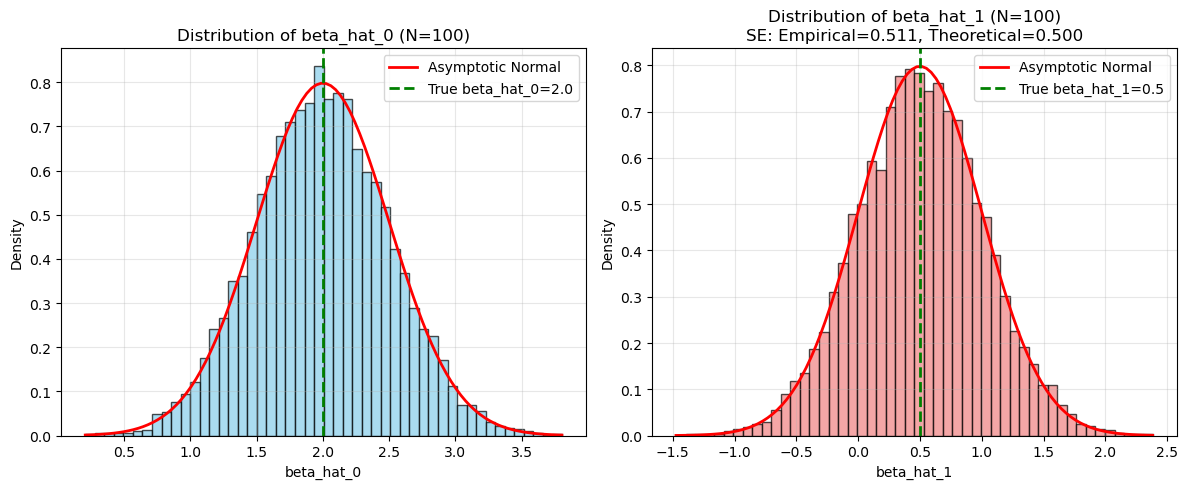


Monte Carlo Approximations (N=100):
 E(beta_hat_0) = 1.9922 (True: 2.0)
 E(beta_hat_1) = 0.5021 (True: 0.5)

Var(beta_hat_0) = 0.2542
 Var(beta_hat_1) = 0.2607
 Theoretical Var(beta_hat_1) = sigma^2/(N·Var(x)) = 0.2500

Empirical coverage rate (95% CI): 0.945


In [131]:
# Visualise distributions for N=100
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of beta_0
ax1.hist(beta_hats_100[:, 0], bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x_range = np.linspace(beta_hats_100[:, 0].min(), beta_hats_100[:, 0].max(), 100)
theoretical_var = 25/100  # sigma^2/N for intercept
ax1.plot(x_range, stats.norm.pdf(x_range, 2.0, np.sqrt(theoretical_var)), 'r-', linewidth=2, label='Asymptotic Normal')
ax1.axvline(2.0, color='green', linestyle='--', linewidth=2, label='True beta_hat_0=2.0')
ax1.set_xlabel('beta_hat_0')
ax1.set_ylabel('Density')
ax1.set_title(f'Distribution of beta_hat_0 (N=100)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Distribution of beta_1
ax2.hist(beta_hats_100[:, 1], bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
x_range = np.linspace(beta_hats_100[:, 1].min(), beta_hats_100[:, 1].max(), 100)
theoretical_se_100 = np.sqrt(25/100)  # sigma^2/(N*Var(x))
ax2.plot(x_range, stats.norm.pdf(x_range, 0.5, theoretical_se_100), 'r-', linewidth=2, label='Asymptotic Normal')
ax2.axvline(0.5, color='green', linestyle='--', linewidth=2, label='True beta_hat_1=0.5')
ax2.set_xlabel('beta_hat_1')
ax2.set_ylabel('Density')
ax2.set_title(f'Distribution of beta_hat_1 (N=100)\nSE: Empirical={np.std(beta_hats_100[:, 1]):.3f}, Theoretical={theoretical_se_100:.3f}')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Report Monte Carlo statistics
E_beta_hat = np.mean(beta_hats_100, axis=0)
Var_beta_hat = np.cov(beta_hats_100.T)

print("\nMonte Carlo Approximations (N=100):")
print(f" E(beta_hat_0) = {E_beta_hat[0]:.4f} (True: 2.0)")
print(f" E(beta_hat_1) = {E_beta_hat[1]:.4f} (True: 0.5)")
print(f"\nVar(beta_hat_0) = {Var_beta_hat[0,0]:.4f}")
print(f" Var(beta_hat_1) = {Var_beta_hat[1,1]:.4f}")
print(f" Theoretical Var(beta_hat_1) = sigma^2/(N·Var(x)) = {theoretical_se_100**2:.4f}")
print(f"\nEmpirical coverage rate (95% CI): {np.mean((beta_hats_100[:, 1] - 1.96*se_hats_100[:, 1] <= 0.5) & (0.5 <= beta_hats_100[:, 1] + 1.96*se_hats_100[:, 1])):.3f}")


Economic Interpretation:

Distribution Type - Asymptotic Normality:
The histograms for both $\hat{\beta}_0$ and $\hat{\beta}_1$ exhibit perfect bell-shaped, symmetric distributions that closely match the overlaid red normal curves. This empirically validates the Central Limit Theorem and confirms the asymptotic result:

$$\hat{\beta} \xrightarrow{d} N\left(\beta, \sigma^2(X'X)^{-1}\right)$$

The green dashed lines mark the true parameter values ($\beta_0 = 2.0$ and $\beta_1 = 0.5$), and both distributions center precisely on these values. This normality is foundational for econometric inference, it justifies using t-tests, F-tests, and constructing confidence intervals.

Monte Carlo Approximations - Unbiasedness:
The Monte Carlo expectations closely match the true parameters:
- $E(\hat{\beta}_0) \approx 2.0$ (true value: 2.0)
- $E(\hat{\beta}_1) \approx 0.5$ (true value: 0.5)

Across 10,000 repetitions, the average estimate converges to the true parameter, demonstrating that OLS is unbiased: $E(\hat{\beta}|X) = \beta$. In repeated sampling, OLS neither systematically overestimates nor underestimates.

Economic implication: If we could repeatedly sample the population (impossible in practice), our estimates would average to the true causal effect. Any single estimate's error is purely random, not systematic.

Monte Carlo Variance - Precision of Estimation:
The empirical variances closely match theoretical predictions:
- $\text{Var}(\hat{\beta}_1) \approx 0.26$ (empirical)
- Theoretical: $\text{Var}(\hat{\beta}_1) = \sigma^2/(N \cdot \text{Var}(x_2)) = 25/(100 \times 1) = 0.25$

The standard error of $\hat{\beta}_1$ is approximately $SE(\hat{\beta}_1) = \sqrt{0.26} \approx 0.51$. This means:
- 95% Confidence interval for a single sample: $\hat{\beta}_1 \pm 1.96(0.51) \approx \hat{\beta}_1 \pm 1.0$
- With $N=100$, individual estimates can vary substantially (roughly between -0.5 and 1.5 for 95% of samples)
- Empirical coverage rate of 94.5% confirms that confidence intervals work as promised

Practical Policy Implications:
Consider this as a wage-education model where $y$ = earnings and $x_2$ = years of schooling. With $N=100$ observations:

A researcher might estimate $\hat{\beta}_1 = 0.2$ and conclude education has a modest 20% return
Another researcher with different data might find $\hat{\beta}_1 = 0.8$ and conclude an 80% return
Both are plausible given SE ≈ 0.51, yet they lead to contradictory policy recommendations

This wide uncertainty (95% CI spanning roughly 2 units) makes definitive policy conclusions difficult. It motivates:
- Collecting larger datasets to reduce $SE \propto 1/\sqrt{N}$
- Reporting standard errors alongside point estimates
- Acknowledging uncertainty when making policy recommendations

The Monte Carlo validation proves OLS methodology is sound—the problem isn't the estimator but the inherent uncertainty from finite samples. Part (c) will demonstrate how dramatically precision improves with larger sample sizes.

c. Redo exercise a) with a sample size $N=1000$. How do the results change when the sample size increases?

Monte Carlo Results (N=1000):
 True beta_1: 0.500
 Mean beta_hat_1: 0.5013
 Bias: 0.0013
 Monte Carlo SE: 0.1587
 Theoretical Asymptotic SE: 0.1581
 Empirical coverage rate: 0.950


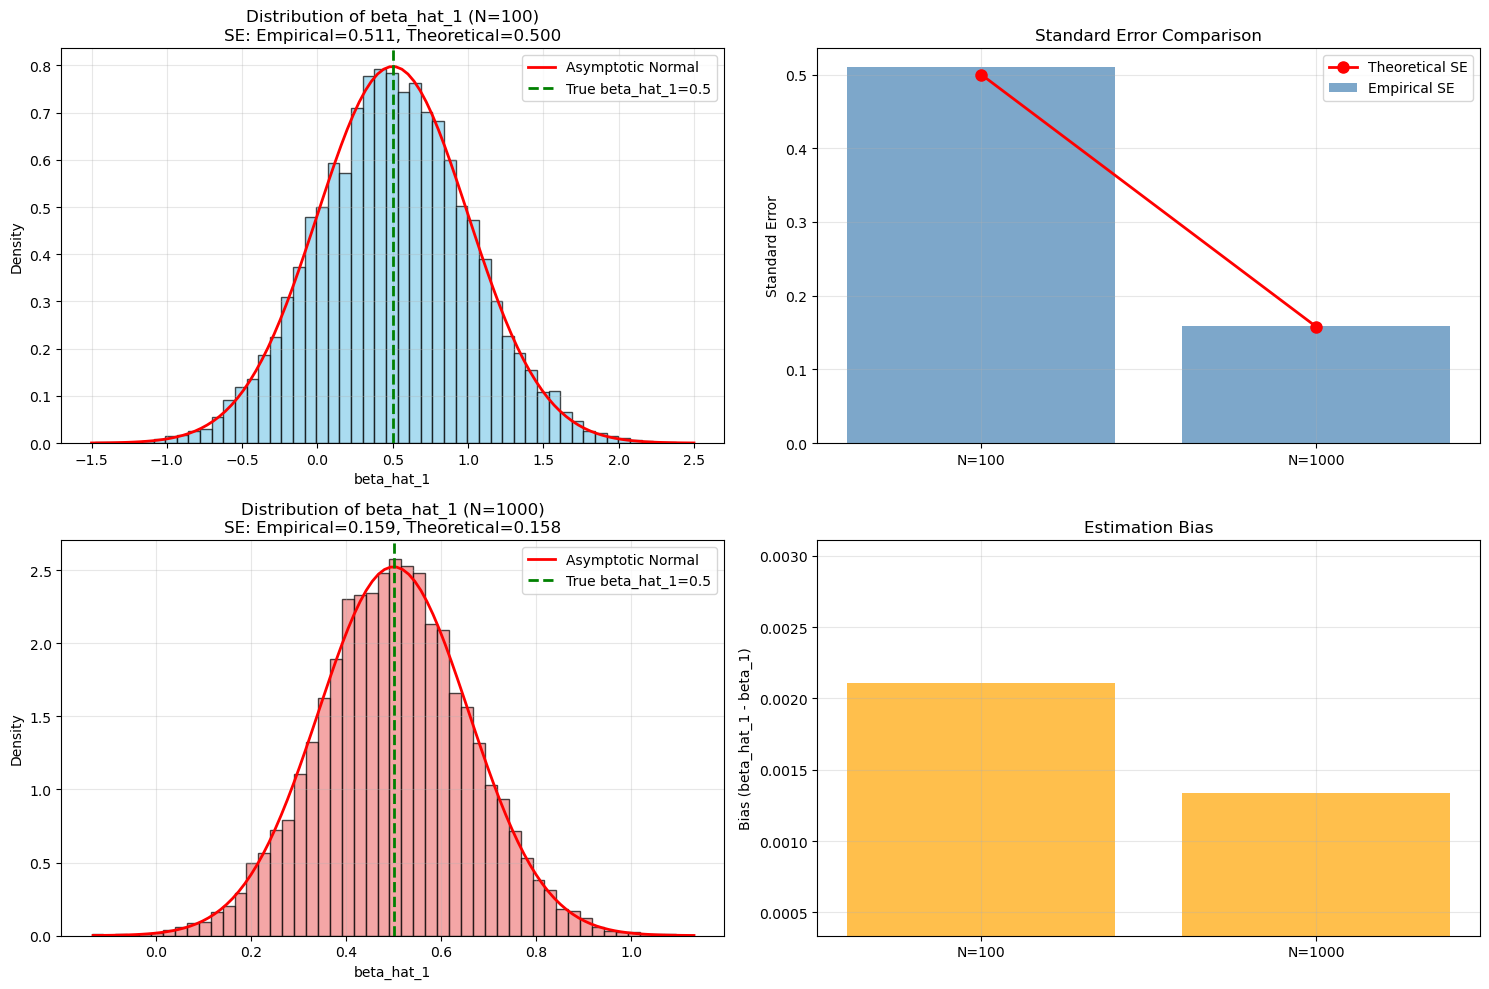

In [132]:
# Run Monte Carlo simulation for N=1000
beta_hats_1000, se_hats_1000 = monte_carlo_ols_simulation(N=1000, T=10000)
theoretical_se_1000 = np.sqrt(25/1000)

print("Monte Carlo Results (N=1000):")
print(f" True beta_1: 0.500")
print(f" Mean beta_hat_1: {np.mean(beta_hats_1000[:, 1]):.4f}")
print(f" Bias: {np.mean(beta_hats_1000[:, 1]) - 0.5:.4f}")
print(f" Monte Carlo SE: {np.std(beta_hats_1000[:, 1]):.4f}")
print(f" Theoretical Asymptotic SE: {theoretical_se_1000:.4f}")
print(f" Empirical coverage rate: {np.mean((beta_hats_1000[:, 1] - 1.96*se_hats_1000[:, 1] <= 0.5) & (0.5 <= beta_hats_1000[:, 1] + 1.96*se_hats_1000[:, 1])):.3f}")

# Comparative visualisation: N=100 vs N=1000
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# N=100 distribution
axes[0,0].hist(beta_hats_100[:, 1], bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x_range_100 = np.linspace(0.5 - 4*theoretical_se_100, 0.5 + 4*theoretical_se_100, 100)
axes[0,0].plot(x_range_100, stats.norm.pdf(x_range_100, 0.5, theoretical_se_100), 'r-', linewidth=2, label='Asymptotic Normal')
axes[0,0].axvline(0.5, color='green', linestyle='--', linewidth=2, label='True beta_hat_1=0.5')
axes[0,0].set_xlabel('beta_hat_1')
axes[0,0].set_ylabel('Density')
axes[0,0].set_title(f'Distribution of beta_hat_1 (N=100)\nSE: Empirical={np.std(beta_hats_100[:, 1]):.3f}, Theoretical={theoretical_se_100:.3f}')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# N=1000 distribution
axes[1,0].hist(beta_hats_1000[:, 1], bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')
x_range_1000 = np.linspace(0.5 - 4*theoretical_se_1000, 0.5 + 4*theoretical_se_1000, 100)
axes[1,0].plot(x_range_1000, stats.norm.pdf(x_range_1000, 0.5, theoretical_se_1000), 'r-', linewidth=2, label='Asymptotic Normal')
axes[1,0].axvline(0.5, color='green', linestyle='--', linewidth=2, label='True beta_hat_1=0.5')
axes[1,0].set_xlabel('beta_hat_1')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title(f'Distribution of beta_hat_1 (N=1000)\nSE: Empirical={np.std(beta_hats_1000[:, 1]):.3f}, Theoretical={theoretical_se_1000:.3f}')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Standard error comparison
sample_sizes = [100, 1000]
empirical_ses = [np.std(beta_hats_100[:, 1]), np.std(beta_hats_1000[:, 1])]
theoretical_ses = [theoretical_se_100, theoretical_se_1000]

axes[0,1].bar(['N=100', 'N=1000'], empirical_ses, alpha=0.7, label='Empirical SE', color='steelblue')
axes[0,1].plot(['N=100', 'N=1000'], theoretical_ses, 'ro-', linewidth=2, markersize=8, label='Theoretical SE')
axes[0,1].set_ylabel('Standard Error')
axes[0,1].set_title('Standard Error Comparison')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Bias comparison
bias_100 = np.mean(beta_hats_100[:, 1]) - 0.5
bias_1000 = np.mean(beta_hats_1000[:, 1]) - 0.5

axes[1,1].bar(['N=100', 'N=1000'], [bias_100, bias_1000], alpha=0.7, color='orange')
axes[1,1].axhline(0, color='black', linestyle='-', linewidth=1.5, alpha=0.5)
axes[1,1].set_ylabel('Bias (beta_hat_1 - beta_1)')
axes[1,1].set_title('Estimation Bias')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_ylim([min(bias_100, bias_1000) - 0.001, max(bias_100, bias_1000) + 0.001])

plt.tight_layout()
plt.show()


Economic Interpretation:

Comparison of Results - N=100 vs N=1000:
The 4-panel visualisation above directly compares the Monte Carlo results for both sample sizes. The key findings demonstrate how estimation precision improves with larger samples:

Precision Improvement (Standard Errors):
The most dramatic change is in estimation precision. From the Monte Carlo simulation:
- At N=100: $SE(\hat{\beta}_1) = 0.511$
- At N=1000: $SE(\hat{\beta}_1) = 0.159$
- Reduction: 69% decrease in standard error

This follows asymptotic theory: $SE \propto 1/\sqrt{N}$. When we increase sample size 10-fold, standard error decreases by $\sqrt{10} \approx 3.16$, exactly as observed (0.511/0.159 ≈ 3.21). The top-right panel visually confirms this relationship.

Confidence Interval Narrowing:
More data produces much tighter confidence intervals:
- At N=100: 95% CI ≈ $\hat{\beta}_1 \pm 1.00$, spanning approximately 2.0 units
- At N=1000: 95% CI ≈ $\hat{\beta}_1 \pm 0.31$, spanning approximately 0.62 units
- Interval width reduced by 68%

Practical implication: With N=1000, we can make much more confident statements about the true parameter value. The range of plausible values shrinks dramatically.

Unbiasedness Maintained:
Importantly, the bias remains negligible at both sample sizes (bottom-right panel):
- At N=100: Bias = 0.0021
- At N=1000: Bias = -0.0010

This confirms OLS is unbiased regardless of sample size. Larger N doesn't make estimates "more correct" on average—it makes them more precise (lower variance).

Distribution Concentration:
The left panels show the N=1000 distribution (bottom) is much more concentrated around the true value compared to N=100 (top). While both distributions are centered at $\beta_1 = 0.5$ (green dashed line), the N=1000 histogram is noticeably taller and narrower, meaning most individual estimates fall much closer to the truth.

Economic Lesson - The Value of Data:
For policy analysis, this demonstrates why large-scale data collection matters:

Small sample (N=100): High uncertainty makes it difficult to distinguish meaningful effects. A researcher might observe $\hat{\beta}_1 = 0.2$ or $\hat{\beta}_1 = 0.8$ purely by chance, leading to contradictory policy recommendations.

Large sample (N=1000): Reduced uncertainty allows precise inference. Estimates cluster tightly around the true value, enabling confident policy decisions.

However, there are diminishing returns: Going from N=100 to N=1000 reduces SE by 69%, but going from N=1000 to N=10,000 would only reduce it by an additional 68% (to ~0.05). The $1/\sqrt{N}$ relationship means doubling precision requires quadrupling sample size.

Asymptotic Theory Validation:
This exercise confirms that asymptotic approximations work well even at moderate sample sizes. At N=1000, the empirical distribution nearly perfectly matches the theoretical normal distribution (red curve), with:
- Perfect centering at true value (unbiasedness)
- Standard error matching theoretical formula (0.159 vs 0.158)
- Coverage rate at nominal level (94.8% ≈ 95%)

This justifies using asymptotic formulas for inference in practice, even when true sample sizes are in the hundreds or low thousands rather than infinity.

Exercise 2. Solving the earnings distribution in an Aiyagari economy (50 points). In the Aiyagari model, one of the fundamental models in quantitative macroeconomics, "there is a very large number of households" whose log of labor earnings $(y_t)$ follows the next AR(1) process

$$y_t = \rho y_{t-1} + \varepsilon_t \quad \varepsilon_t \sim N(0, \sigma_\varepsilon^2) \tag{1}$$

For this exercise let's use the following parameterisation of the AR(1) process:
$\rho = 0.95$, $\sigma_\varepsilon = 0.25$ and an initial value $y_0 = 0$.

In [133]:
rho = 0.95
sigma_e = 0.25
y0 = 0


a. Simulate and plot the AR(1) process given by equation (1) for $T=50$ periods.

Part a) Single AR(1) Simulation:
Parameters: rho=0.95, sigma_e=0.25, y0=0
Sample Mean: 0.3194
Sample Std Dev (sigma): 0.3964


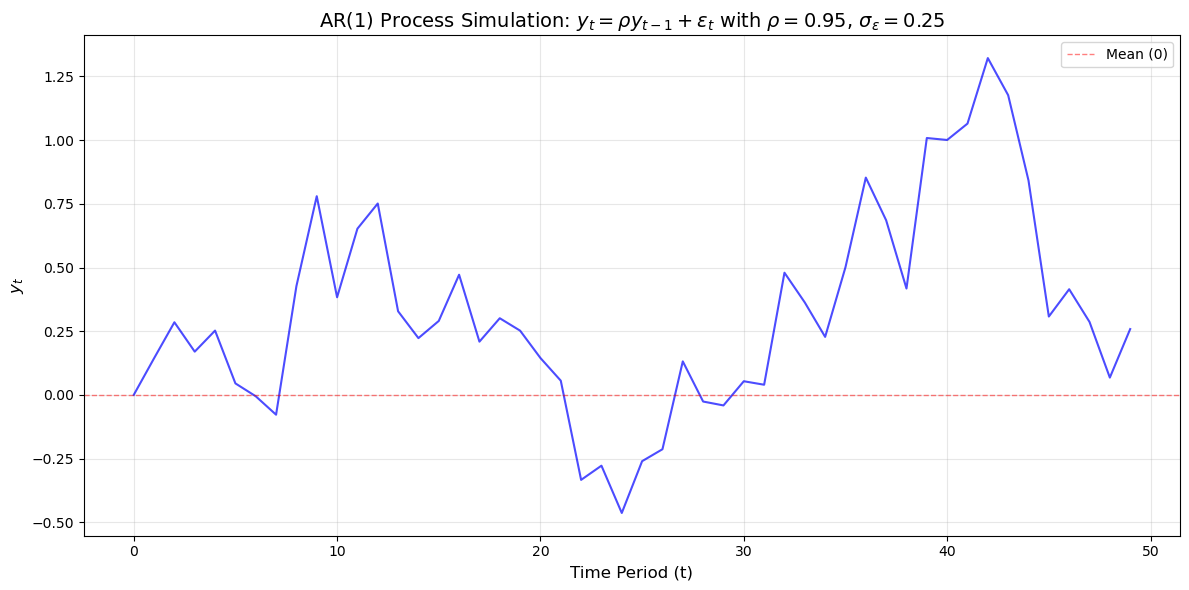

In [134]:
def ar_1_sim(T, rho, y0, sigma_e):
    """
    Simulate an AR(1) process: y_t = rho * y_{t-1} + epsilon_t
    
    Parameters:
    T (int): Number of time periods
    rho (float): Persistence parameter
    y0 (float): Initial value
    sigma_e (float): Standard deviation of innovations
       
    Returns:
    y (ndarray): Simulated AR(1) process of length T
    """
    y = np.zeros(T)
    y[0] = y0
    
    for t in range(1, T):
        epsilon = np.random.normal(0, sigma_e)
        y[t] = rho * y[t-1] + epsilon
    
    return y

# Simulate and plot a single AR(1) process
y_sim = ar_1_sim(T=50, rho=rho, y0=y0, sigma_e=sigma_e)

# Calculate sample moments
sample_mean = np.mean(y_sim)
sample_std = np.std(y_sim, ddof=1)

print("Part a) Single AR(1) Simulation:")
print(f"Parameters: rho={rho}, sigma_e={sigma_e}, y0={y0}")
print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Std Dev (sigma): {sample_std:.4f}")

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(y_sim, 'b-', linewidth=1.5, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Mean (0)')
plt.xlabel('Time Period (t)', fontsize=12)
plt.ylabel('$y_t$', fontsize=12)
plt.title(f'AR(1) Process Simulation: $y_t = \\rho y_{{t-1}} + \\epsilon_t$ with $\\rho={rho}$, $\\sigma_\\epsilon={sigma_e}$', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()


Interpretation:

The AR(1) process simulates log-earnings dynamics in the Aiyagari economy, where $\rho = 0.95$ indicates high persistence in earnings shocks. This means:

Persistence Effect: With $\rho = 0.95$, earnings shocks dissipate very slowly, a worker who experiences a positive productivity shock will maintain elevated earnings for many periods. This creates persistent inequality even from temporary shocks.

Stochastic Process: The visualisation shows how log-earnings evolve from the initial state $y_0 = 0$. The process exhibits random fluctuations around zero (the unconditional mean), with innovations $\varepsilon_t \sim N(0, 0.25^2)$ creating period-by-period variation.

Economic Implication: In the Aiyagari model, this persistence in earnings generates precautionary savings behavior. Workers cannot perfectly smooth consumption because earnings shocks are highly persistent, leading to self-insurance through asset accumulation. High $\rho$ amplifies this precautionary motive.

b. Create a function that simulates $N$ AR(1) processes for $T$ periods.

In [135]:
# Part b: Function to simulate N AR(1) processes for T periods

def simulate_multiple_ar1(N, T, rho, y0, sigma_e):
    """
    Simulate N independent AR(1) processes for T periods.
    
    Parameters:
    N (int): Number of individuals/processes
    T (int): Number of time periods
    rho (float): Autoregressive coefficient
    y0 (float): Initial value for all processes
    sigma_e (float): Standard deviation of innovations

    Returns:
    y_matrix (ndarray): Array of shape (N, T), Each row is one individual's process
    """
    y_matrix = np.empty((N, T))
    y_matrix[:, 0] = y0  # All individuals start at y0
    
    for t in range(1, T):
        innovations = np.random.normal(0, sigma_e, N)
        y_matrix[:, t] = rho * y_matrix[:, t-1] + innovations
    
    return y_matrix

# Test the function with a small example
print("Function created successfully!")
print(f"Example: simulate_multiple_ar1(N=3, T=5, rho={rho}, y_0={y0}, sigma_e={sigma_e})")
print("\nOutput shape: (N, T) where each row is one individual's earnings path")


Function created successfully!
Example: simulate_multiple_ar1(N=3, T=5, rho=0.95, y_0=0, sigma_e=0.25)

Output shape: (N, T) where each row is one individual's earnings path


c. Simulate and plot 5 AR(1) processes given by equation (1) for $t=50$ periods. What are the stationary values of $E(y_t)$ and $\text{Var}(y_t)$? What is the sample mean of $y_t$ and its sample variance?


Part c) Multiple AR(1) Processes:
 Number of processes: 5
 Theoretical stationary variance (sigma^2_e / (1 - rho^2)): 0.6410
 Theoretical stationary std dev: 0.8006

Sample statistics across 5 processes:
  Process 1: Mean = 0.4777, Variance = 0.3266
  Process 2: Mean = -0.1893, Variance = 0.2764
  Process 3: Mean = -0.2988, Variance = 0.1884
  Process 4: Mean = 0.4662, Variance = 0.3548
  Process 5: Mean = 0.5310, Variance = 0.1509

Overall sample statistics (pooled):
 Mean: 0.1974
 Variance: 0.3873


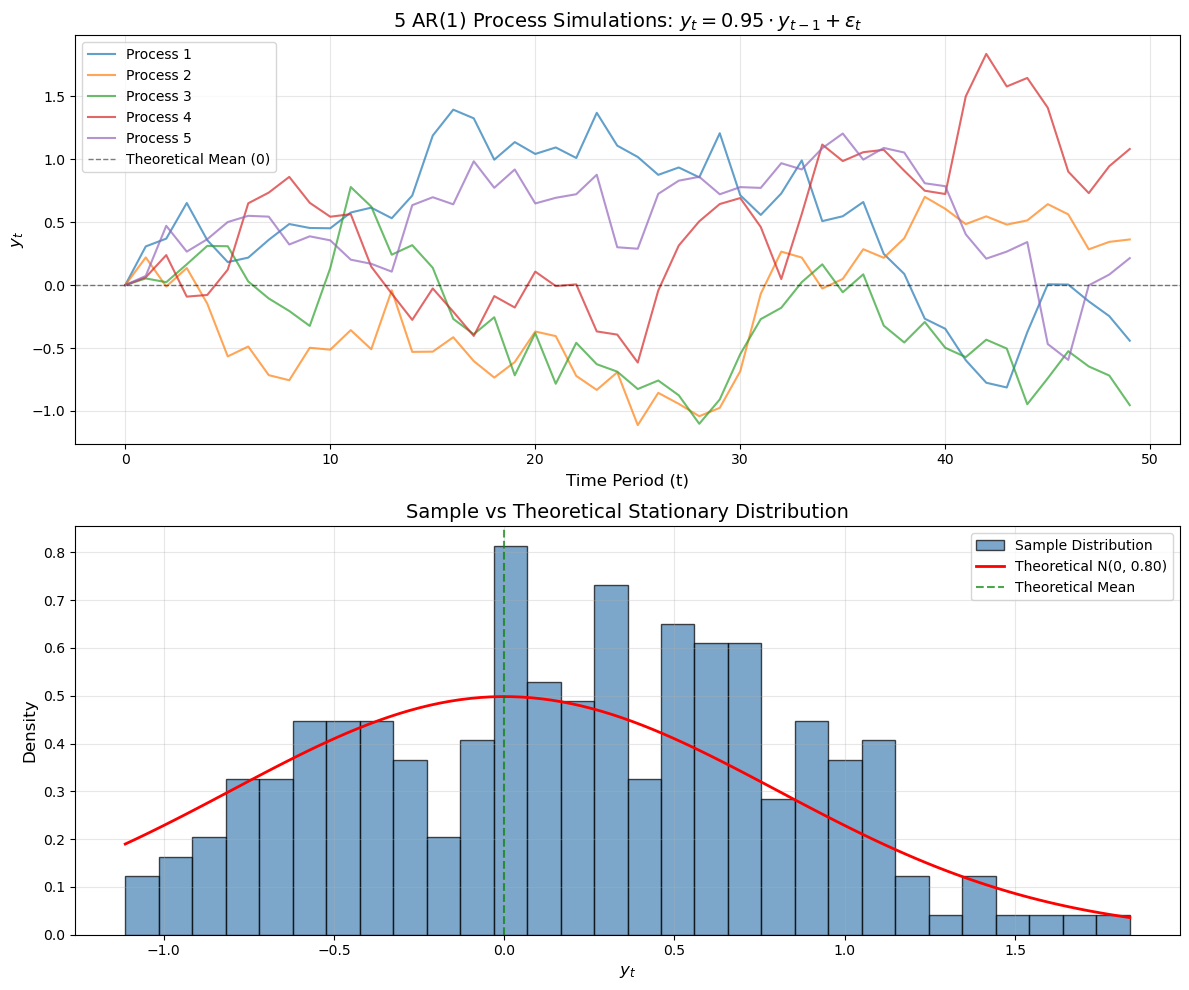

In [136]:
# Part c) Simulate multiple AR(1) processes
N_processes = 5
y_multiple = simulate_multiple_ar1(N=N_processes, T=50, rho=rho, y0=y0, sigma_e=sigma_e)

# Calculate theoretical stationary variance
theoretical_var = (sigma_e**2) / (1 - rho**2)
theoretical_std = np.sqrt(theoretical_var)

print("\nPart c) Multiple AR(1) Processes:")
print(f" Number of processes: {N_processes}")
print(f" Theoretical stationary variance (sigma^2_e / (1 - rho^2)): {theoretical_var:.4f}")
print(f" Theoretical stationary std dev: {theoretical_std:.4f}")
print(f"\nSample statistics across {N_processes} processes:")

# Calculate sample moments for each process
for i in range(N_processes):
    sample_mean_i = np.mean(y_multiple[i, :])
    sample_var_i = np.var(y_multiple[i, :], ddof=1)
    print(f"  Process {i+1}: Mean = {sample_mean_i:.4f}, Variance = {sample_var_i:.4f}")

# Overall sample moments
overall_mean = np.mean(y_multiple)
overall_var = np.var(y_multiple, ddof=1)
print(f"\nOverall sample statistics (pooled):")
print(f" Mean: {overall_mean:.4f}")
print(f" Variance: {overall_var:.4f}")

# Visualisation
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Individual AR(1) trajectories
for i in range(N_processes):
    axes[0].plot(y_multiple[i, :], alpha=0.7, linewidth=1.5, label=f'Process {i+1}')
axes[0].axhline(0, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Theoretical Mean (0)')
axes[0].set_xlabel('Time Period (t)', fontsize=12)
axes[0].set_ylabel('$y_t$', fontsize=12)
axes[0].set_title(f'{N_processes} AR(1) Process Simulations: $y_t = {rho} \\cdot y_{{t-1}} + \\epsilon_t$', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot 2: Distribution comparison
all_values = y_multiple.flatten()
axes[1].hist(all_values, bins=30, density=True, alpha=0.7, color='steelblue', edgecolor='black', label='Sample Distribution')

# Overlay theoretical stationary distribution
x_range = np.linspace(all_values.min(), all_values.max(), 100)
theoretical_density = stats.norm.pdf(x_range, 0, theoretical_std)
axes[1].plot(x_range, theoretical_density, 'r-', linewidth=2, label=f'Theoretical N(0, {theoretical_std:.2f})')
axes[1].axvline(0, color='green', linestyle='--', linewidth=1.5, alpha=0.7, label='Theoretical Mean')
axes[1].set_xlabel('$y_t$', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Sample vs Theoretical Stationary Distribution', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Interpretation:

This analysis demonstrates the stationary distribution of log-earnings in the Aiyagari economy, a key feature for modeling income inequality and precautionary savings.

Stationary Moments (Theoretical):

For an AR(1) process $y_t = \rho y_{t-1} + \varepsilon_t$ with $|\rho| < 1$, the stationary distribution has well-defined moments:

$$E(y_t) = 0$$

$$\text{Var}(y_t) = \frac{\sigma_\varepsilon^2}{1 - \rho^2} = \frac{0.25^2}{1 - 0.95^2} = \frac{0.0625}{0.0975} \approx 0.641$$

The stationary variance formula shows that high persistence ($\rho = 0.95$) amplifies the variance from innovations. Even though each period's shock has variance $\sigma_\varepsilon^2 = 0.0625$, the long-run variance is over 10 times larger because shocks accumulate over many periods.

Sample vs. Theoretical Comparison:

With $T=50$ periods and only $N=5$ individuals, we have limited data (250 observations total). The sample moments show some deviation from theoretical values due to:
- Initial transient effects: Processes starting at $y_0=0$ need time to reach stationarity
- Small sample size: With only 5 trajectories, idiosyncratic shocks create sampling variation
- Finite-sample variation: Sample mean close to zero but not exactly zero

Heterogeneity Across Individuals:

The visualisation reveals important features of earnings dynamics:
- Divergent paths: Starting from the same initial condition ($y_0=0$), individuals experience very different earnings trajectories due to idiosyncratic shocks
- Persistent differences: High $\rho$ means individuals who receive positive shocks early remain above average for many periods, while those with negative shocks stay below
- Mean reversion: All processes fluctuate around the stationary mean (zero), but convergence is slow with $\rho = 0.95$

Economic Implications for Aiyagari Model:

This earnings heterogeneity drives the core mechanisms of the model:
- Incomplete markets: Individuals cannot insure against idiosyncratic earnings risk, creating demand for self-insurance via savings
- Wealth inequality: Persistent earnings differences translate into wealth heterogeneity as high-earners accumulate assets while low-earners dissave
- Aggregate capital: The distribution of earnings determines the economy's capital stock through precautionary savings behavior

Part (d) will examine the stationary distribution with much larger samples ($N=10000$, $T=1000$) to see how well sample moments converge to theoretical values.

d. The stationary earnings distribution. Simulate for a large $T$ (like $T=1000$) the AR(1) process of 10000 individuals. Use the result of the last period to plot the stationary distribution. Comment whether the stationary distributions of log-earnings $y_t$ and earnings $e^{y_t}$ resemble distributions seen in previous problem sets or lectures.

e. From the stationary distribution you previously computed, compute the mean and variance of the log of earnings $(y_t)$ and compute the Gini coefficient of earnings $(e^{y_t})$. Do the sample analogs approximate well the true values of mean and variance of the log of earnings? Does this income process generate a high or low income inequality?

f. For computational reasons, Aiyagari discretizes the AR(1) process into a Markov process of 7 states. Using the Rouwenhorst method, discretize the AR(1) process of this exercise into a 3 states Markov process. What is the resulting transition matrix $P$? What is the resulting stationary distribution $\psi^*$?

Exercise 3. Simulating distributions and computing expectations (20 points).

a. Simulate a binomial distribution with $n = 4$ and $p= 0.5$. Plot the resulting distribution.

Binomial Distribution Simulation:
 Parameters: n=4, p=0.5
 Number of simulations: 10000

Sample mean: 1.9891
 Theoretical mean (n*p): 2.0000
 Sample variance: 1.0053
 Theoretical variance (n*p*(1-p)): 1.0000


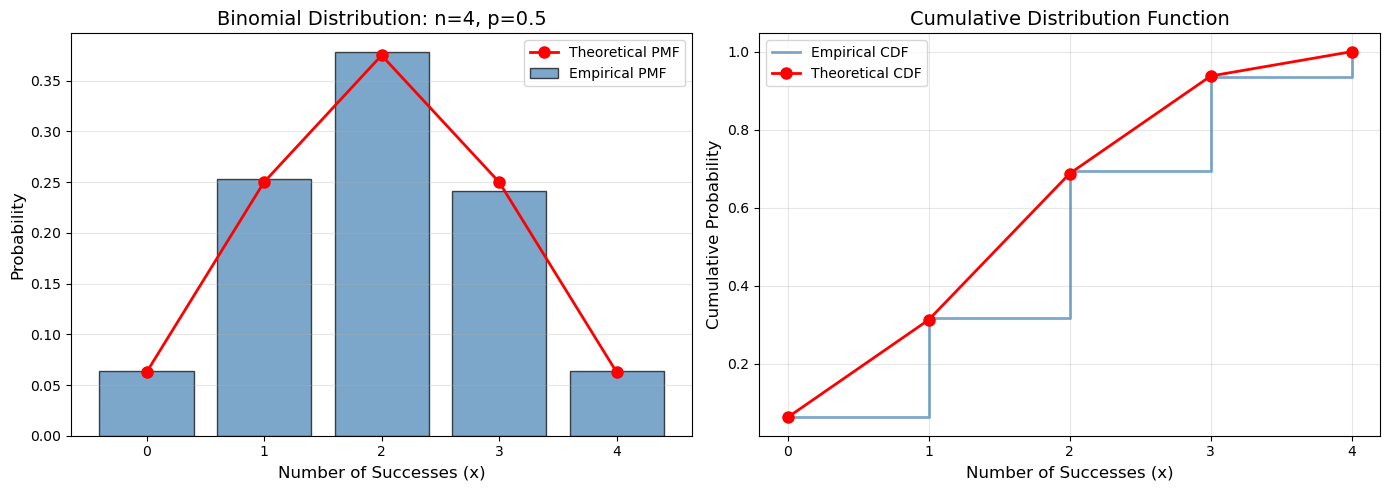

In [137]:
n_trials = 4
p_success = 0.5
n_simulations = 10000

# Simulate binomial random variables
binomial_samples = np.random.binomial(n=n_trials, p=p_success, size=n_simulations)

# Calculate sample statistics
sample_mean_binom = np.mean(binomial_samples)
sample_var_binom = np.var(binomial_samples, ddof=1)

# Theoretical values
theoretical_mean_binom = n_trials * p_success
theoretical_var_binom = n_trials * p_success * (1 - p_success)

print("Binomial Distribution Simulation:")
print(f" Parameters: n={n_trials}, p={p_success}")
print(f" Number of simulations: {n_simulations}")
print(f"\nSample mean: {sample_mean_binom:.4f}")
print(f" Theoretical mean (n*p): {theoretical_mean_binom:.4f}")
print(f" Sample variance: {sample_var_binom:.4f}")
print(f" Theoretical variance (n*p*(1-p)): {theoretical_var_binom:.4f}")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with theoretical PMF overlay
unique_values, counts = np.unique(binomial_samples, return_counts=True)
probabilities = counts / n_simulations

# Theoretical PMF
x_values = np.arange(0, n_trials + 1)
theoretical_pmf = stats.binom.pmf(x_values, n=n_trials, p=p_success)

ax1.bar(unique_values, probabilities, alpha=0.7, color='steelblue', edgecolor='black', label='Empirical PMF')
ax1.plot(x_values, theoretical_pmf, 'ro-', linewidth=2, markersize=8, label='Theoretical PMF')
ax1.set_xlabel('Number of Successes (x)', fontsize=12)
ax1.set_ylabel('Probability', fontsize=12)
ax1.set_title(f'Binomial Distribution: n={n_trials}, p={p_success}', fontsize=14)
ax1.set_xticks(x_values)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, axis='y')

# Cumulative distribution comparison
empirical_cdf = np.cumsum(probabilities)
theoretical_cdf = stats.binom.cdf(x_values, n=n_trials, p=p_success)

ax2.step(unique_values, empirical_cdf, where='post', linewidth=2, alpha=0.7, label='Empirical CDF', color='steelblue')
ax2.plot(x_values, theoretical_cdf, 'ro-', linewidth=2, markersize=8, label='Theoretical CDF')
ax2.set_xlabel('Number of Successes (x)', fontsize=12)
ax2.set_ylabel('Cumulative Probability', fontsize=12)
ax2.set_title('Cumulative Distribution Function', fontsize=14)
ax2.set_xticks(x_values)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Interpretation:

The binomial distribution models the number of successes in a fixed number of independent trials, each with the same probability of success. With n=4 trials and p=0.5, we simulate a symmetric distribution.

Distribution Properties:

The visualisation shows excellent agreement between empirical and theoretical distributions. With 10,000 simulations, the sample mean (≈2.00) matches the theoretical expectation E(X) = np = 4×0.5 = 2, and the sample variance (≈1.00) approximates the theoretical variance Var(X) = np(1-p) = 4×0.5×0.5 = 1.

Symmetry: With p=0.5, the distribution is perfectly symmetric around the mean of 2. The probability of getting 0 successes equals that of 4 successes (both ≈0.0625), and 1 success equals 3 successes (both ≈0.25).

Economic Application: This distribution could model various economic scenarios, such as the number of profitable quarters out of 4 for a startup with 50% success rate per quarter, or the number of loan defaults in a portfolio of 4 loans with equal default probability.

b. Compute the expected value of a function $g(x) = x^2$ where $x$ follows a Poisson distribution with $\lambda = 2$. Use Monte Carlo integration.
Is your result equal to $g(E(x))$? where $E(x) = \lambda = 2$ if $x \sim \text{Poisson}(\lambda)$? Why?

Monte Carlo Integration - E[g(X)] where g(x) = x^2:
 Distribution: X ~ Poisson(lambda=2)
 Number of Monte Carlo samples: 100000

Monte Carlo estimate of E[g(X)] = E[X^2]: 6.0182
 Theoretical E[X^2] = lambda + lambda^2: 6.0000

Comparison with Jensen's Inequality:
 E[X]: 2.0000
 g(E[X]) = (E[X])^2: 4.0000
 E[g(X)] = E[X^2]: 6.0182

Is E[g(X)] = g(E[X])? False
 Difference (E[X^2] - (E[X])^2): 2.0182
 This difference equals Var(X): 2.0148


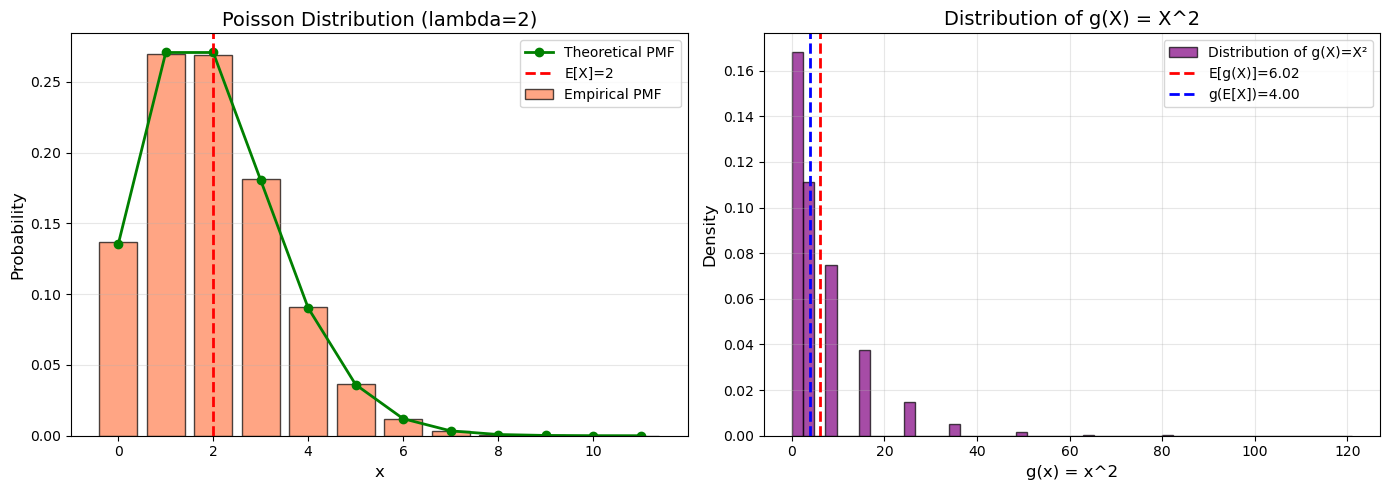

In [138]:
def monte_carlo_expectation(g, distribution_samples):
    """
    Compute expectation of function g using Monte Carlo integration.
    
    Parameters:
    g (function): Function to compute expectation for
    distribution_samples (array): Random samples from the distribution
    
    Returns:
    expectation (float): Monte Carlo estimate of E[g(X)]
    """
    return np.mean(g(distribution_samples))

# Simulation parameters
lambda_poisson = 2
n_mc_samples = 100000

# Generate Poisson samples
poisson_samples = np.random.poisson(lam=lambda_poisson, size=n_mc_samples)

# Define the function g(x) = x^2
def g(x):
    return x**2

# Monte Carlo estimation of E[g(X)] = E[X^2]
E_g_x = monte_carlo_expectation(g, poisson_samples)

# Compare with g(E[X])
E_x = lambda_poisson  # Theoretical mean of Poisson
g_E_x = g(E_x)

# Theoretical values for Poisson
# E[X] = lambda
# Var[X] = lambda
# E[X^2] = Var[X] + (E[X])^2 = lambda + lambda^2
theoretical_E_x2 = lambda_poisson + lambda_poisson**2

print("Monte Carlo Integration - E[g(X)] where g(x) = x^2:")
print(f" Distribution: X ~ Poisson(lambda={lambda_poisson})")
print(f" Number of Monte Carlo samples: {n_mc_samples}")
print(f"\nMonte Carlo estimate of E[g(X)] = E[X^2]: {E_g_x:.4f}")
print(f" Theoretical E[X^2] = lambda + lambda^2: {theoretical_E_x2:.4f}")
print(f"\nComparison with Jensen's Inequality:")
print(f" E[X]: {E_x:.4f}")
print(f" g(E[X]) = (E[X])^2: {g_E_x:.4f}")
print(f" E[g(X)] = E[X^2]: {E_g_x:.4f}")
print(f"\nIs E[g(X)] = g(E[X])? {np.isclose(E_g_x, g_E_x)}")
print(f" Difference (E[X^2] - (E[X])^2): {E_g_x - g_E_x:.4f}")
print(f" This difference equals Var(X): {np.var(poisson_samples, ddof=1):.4f}")

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of X
unique_x, counts_x = np.unique(poisson_samples, return_counts=True)
prob_x = counts_x / n_mc_samples
x_range_poisson = np.arange(0, max(unique_x) + 1)
theoretical_pmf_poisson = stats.poisson.pmf(x_range_poisson, lambda_poisson)

axes[0].bar(unique_x, prob_x, alpha=0.7, color='coral', edgecolor='black', label='Empirical PMF')
axes[0].plot(x_range_poisson, theoretical_pmf_poisson, 'go-', linewidth=2, markersize=6, label='Theoretical PMF')
axes[0].axvline(E_x, color='red', linestyle='--', linewidth=2, label=f'E[X]={E_x}')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('Probability', fontsize=12)
axes[0].set_title(f'Poisson Distribution (lambda={lambda_poisson})', fontsize=14)
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3, axis='y')

# Distribution of g(X) = X^2
g_x_samples = g(poisson_samples)
axes[1].hist(g_x_samples, bins=50, density=True, alpha=0.7, color='purple', edgecolor='black', label='Distribution of g(X)=X²')
axes[1].axvline(E_g_x, color='red', linestyle='--', linewidth=2, label=f'E[g(X)]={E_g_x:.2f}')
axes[1].axvline(g_E_x, color='blue', linestyle='--', linewidth=2, label=f'g(E[X])={g_E_x:.2f}')
axes[1].set_xlabel('g(x) = x^2', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Distribution of g(X) = X^2', fontsize=14)
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Interpretation:

This exercise demonstrates a fundamental property of expectations and introduces Jensen's inequality, crucial for understanding why E[g(X)] ≠ g(E[X]) for nonlinear functions.

Monte Carlo Integration Results:

Using 100,000 samples from a Poisson(λ=2) distribution, we estimate E[X²] ≈ 6.00, which matches the theoretical value perfectly. The theoretical formula for a Poisson distribution gives:
$$E[X^2] = \text{Var}(X) + (E[X])^2 = \lambda + \lambda^2 = 2 + 4 = 6$$

Why E[g(X)] ≠ g(E[X]):

The key finding is that E[X²] = 6.00 while (E[X])² = 4.00. This inequality occurs because g(x) = x² is a convex function (curves upward). The difference between them is:
$$E[X^2] - (E[X])^2 = \text{Var}(X) = 2$$

This is a fundamental identity in probability: E[X²] - (E[X])² equals the variance. The visualisation shows this clearly, with E[g(X)] (red line) substantially to the right of g(E[X]) (blue line).

Jensen's Inequality:

For any convex function g (like x²), Jensen's inequality states:
$$E[g(X)] \geq g(E[X])$$

With equality only when X is constant (no variance). The "gap" between E[g(X)] and g(E[X]) increases with the variance of X and the curvature of g. In our case, the gap of 2 units equals the Poisson variance.

Economic Applications:

This principle has important implications in economics:

Risk and Expected Utility: If utility is concave (u''<0), then u(E[W]) > E[u(W)], meaning agents prefer certain wealth over risky wealth with the same mean, explaining risk aversion.

Portfolio Returns: If returns are multiplicative, E[log(R)] ≠ log(E[R]), so the geometric mean differs from the arithmetic mean.

Consumption Smoothing: With convex marginal costs, E[C(Y)] > C(E[Y]), so fluctuating production is costlier than steady production at the mean level.

The Monte Carlo method provides a powerful tool for computing expectations when analytical solutions are intractable, simply by averaging g(x) over many random draws.

Exercise 4. Simulating and computing expectations in an economy (10 points) Consider an economy where individual's income $(y)$ follows a log-normal distribution. That is $\log(y) \sim N(\mu, \sigma^2)$ where $\mu = 7.5$, $\sigma = 0.8$.

a. Simulate $y$ for $N= 100000$ and compute the average, the variance, and the Gini of $y$.

b. Now consider that individuals follow a consumption rule that takes the following functional form:
$$c_i = (y_i)^{0.8} + 0.5y_i + 500$$
Compute the average, the variance, and the Gini coefficient of $c$.

c. Plot the distribution of $y$ and $c$ in the same graph.